In [36]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
mouse_drug_data.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [37]:
#Read & display clinical data
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")
clinical_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [38]:
# Combine the data into a single dataset
drug_trial_data = clinical_data.merge(mouse_drug_data, on = 'Mouse ID', how = 'outer')
drug_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [39]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint  & convert to DF
tumor_response_df= drug_trial_data[['Drug', 'Timepoint','Tumor Volume (mm3)']]
tumor_response_df= pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

# Preview DataFrame
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [40]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint, convert and preview DF
tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [53]:
# Minor Data Munging to Re-Format the Data Frames & preview
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


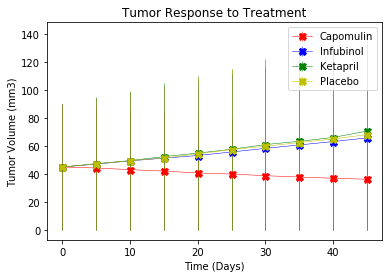

In [46]:
# Generate the Plot (with Error Bars)

# Save the Figure

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_pivot['Capomulin'],
             color='r', marker='X', markersize=7, linestyle='-', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_pivot['Infubinol'],
             color='b', marker='X', markersize=7, linestyle='-', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_pivot['Ketapril'],
             color='g', marker='X', markersize=7, linestyle='-', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_pivot['Placebo'],
             color='y', marker='X', markersize=7, linestyle='-', linewidth=0.5)

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='best')
plt.show()


## Metastatic Response to Treatment

In [54]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_response_df = drug_trial_data[['Drug', 'Timepoint', 'Metastatic Sites']]

metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

metastatic_response_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [55]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)
metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [56]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_response_sem_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Site SEM')  
metastatic_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
25,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
30,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
35,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
40,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


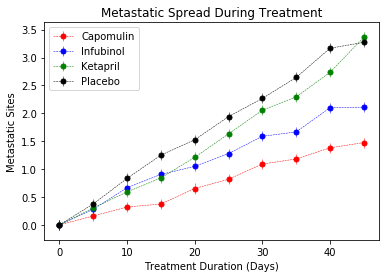

In [57]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='best')
plt.show()

## Survival Rates

In [58]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
survival_rate_df = drug_trial_data[['Drug', 'Timepoint', 'Mouse ID']]

survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])

survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
survival_rate_df.head()

Mouse ID  Mouse Count
Drug      Timepoint                      
Capomulin 0             b128           25
          5             b128           25
          10            b128           25
          15            b128           24
          20            b128           23

In [59]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


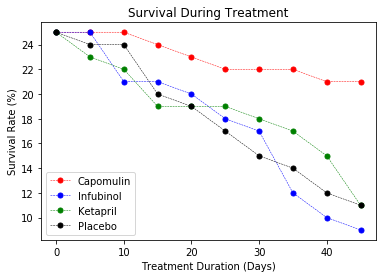

In [61]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='best')
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

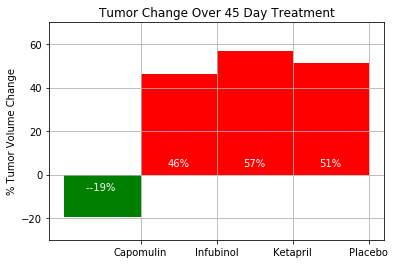